In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import generate_data as gd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X,y = gd.gaussian_clusters(nr_features=10, nr_classes=200, \
                           nr_data_points=200, random_diag=True, variance_size=2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
knn = KNeighborsClassifier(n_neighbors=20)

sfs = SFS(knn,
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X_train, y_train)

sbs = SFS(knn,
           k_features=4,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2019-05-09 21:46:20] Features: 1/4 -- score: 0.5996125099548495[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.7s finished

[2019-05-09 21:46:27] Features: 2/4 -- score: 0.8899551882245669[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.1s finished

[2019-05-09 21:46:33] Features: 3/4 -- score: 0.9858589773327064[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [40]:
# Accuracy for forward SFS
wrap_feat = list(sfs.k_feature_idx_)
print("Features chosen by forward seq wrapping {}" .format(wrap_feat))
knn.fit(X_train[:, wrap_feat], y_train)

y_train_pred = knn.predict(X_train[:, wrap_feat])
print("Training acc after forward seq wrapping: %.3f" % acc(y_train, y_train_pred))

y_test_pred = knn.predict(X_test[:, wrap_feat])
print("Test acc after forward seq wrapping: %.3f" % acc(y_test, y_test_pred))

# Accuracy for backward SFS
wrap_feat = list(sbs.k_feature_idx_)
print("\nFeatures chosen by backward seq wrapping {}" .format(wrap_feat))
knn.fit(X_train[:, wrap_feat], y_train)

y_train_pred = knn.predict(X_train[:, wrap_feat])
print("Training acc after backward seq wrapping: %.3f" % acc(y_train, y_train_pred))

y_test_pred = knn.predict(X_test[:, wrap_feat])
print("Test acc after backward seq wrapping: %.3f" % acc(y_test, y_test_pred))

# Accuracy for entire feature space
knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train)
print("\nTraining acc on all data: %.3f" % acc(y_train, y_train_pred))

y_test_pred = knn.predict(X_test)
print("Test acc on all data: %.3f" % acc(y_test, y_test_pred))

Features chosen by forward seq wrapping [0, 2, 3, 4]
Training acc after forward seq wrapping: 0.999
Test acc after forward seq wrapping: 0.999

Features chosen by backward seq wrapping [0, 1, 2, 5]
Training acc after backward seq wrapping: 0.999
Test acc after backward seq wrapping: 0.999

Training acc on all data: 1.000
Test acc on all data: 1.000


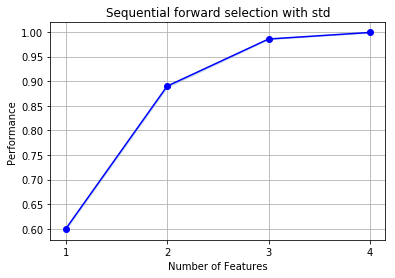

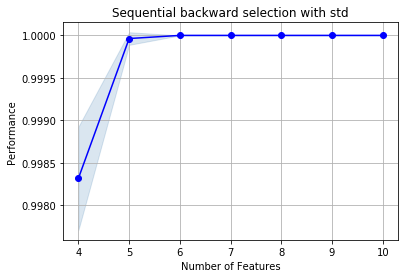

In [45]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential forward selection with std')
plt.grid()

plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential backward selection with std')
plt.grid()


plt.show()